In [1]:
from IPython.display import display, HTML 
display(HTML("""
<style>
div.container{width:86% !important;}
div.cell.code_cell.rendered{width:100%;}
div.CodeMirror {font-family:Consolas; font-size:15pt;}
div.output {font-size:15pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:15pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:12pt;padding:5px;}
table.dataframe{font-size:15px;}
</style>
"""))

<b><font size="5" color="red">ch12. 데이터 시각화 </font><b>
- 시각화 라이브러리 : matplotlib, seaborn(데이터시각화), folium(지도시각화)
    * matplotlib : 파이썬에서 가장 쉽게 많이 사용하는 시각화 라이브러리. 판다스 내부에 포함
    * seaborn : matplotlib기반으로 다양한 색, 테마, 차트 기능과 groupby 기능 포함된 라이브러리
# 1절. matplotlib
    
    - https://pypi.org/project/matplotlib/
    - https://matplotlib.org/stable/api/index

In [3]:
import matplotlib

matplotlib.__version__

'3.7.0'

## 1.1 패키지 import 및 기본 설정

In [2]:
# 시작전 설정
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%config InlineBackend.figure_format='retina'

#한글설정
plt.rc('font', family='Malgun Gothic') # 윈도우 폰트
plt.rc('axes', unicode_minus=False) # 축의 - 깨짐 방지
# plt.rcParams['font.family'] = 'Malgun Gothic'

# warning(경고) 안보이게
# importwarnings
# warnings.filterwarnings(action='ignore')

## 1.2 그래프 그리기
- matplotlib으로 그래프 그리기 위한 단계
    1. 데이터 준비
    2. 그래프 생성
    3. 그래프 함수로 그리기
    4. 그래프 출력 및 저장

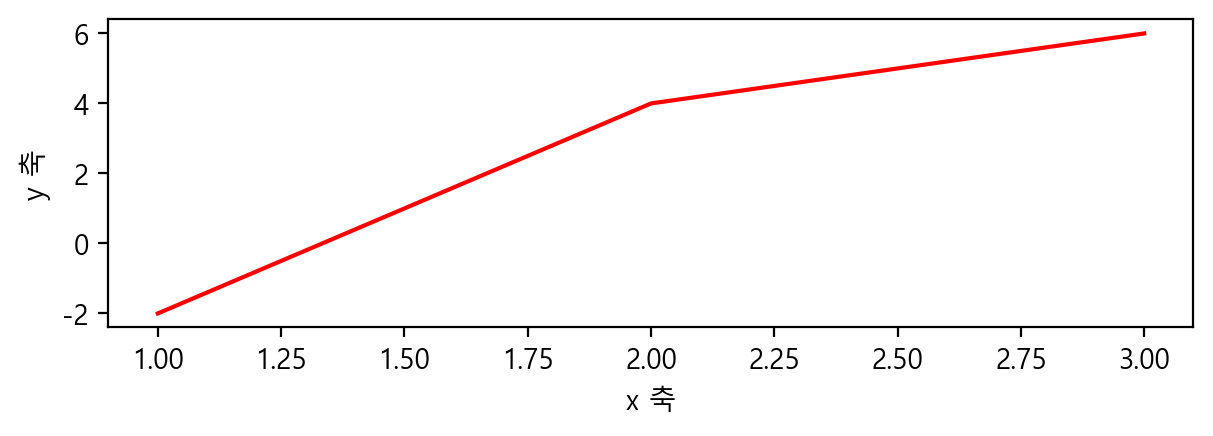

In [3]:
x = [1,2,3] # 1)데이터 준비
y = [-2,4,6]
plt.figure(figsize=(7,2)) # 2) 그래프 객체 생성
plt.plot(x,y, color='red') # 3) 그래프 함수
plt.ylabel('y 축') # 4) 커스터마이징
plt.xlabel('x 축')
plt.show() # 5) 그래프 화면 출력 cf) plt.savefig('파일명.jpg')

## 1.3 그래프 영역 나누기
### 1) subplot() 함수로 서브플롯 추가

In [4]:
import numpy as np
x = np.arange(0,10,0.01)
len(x)

1000

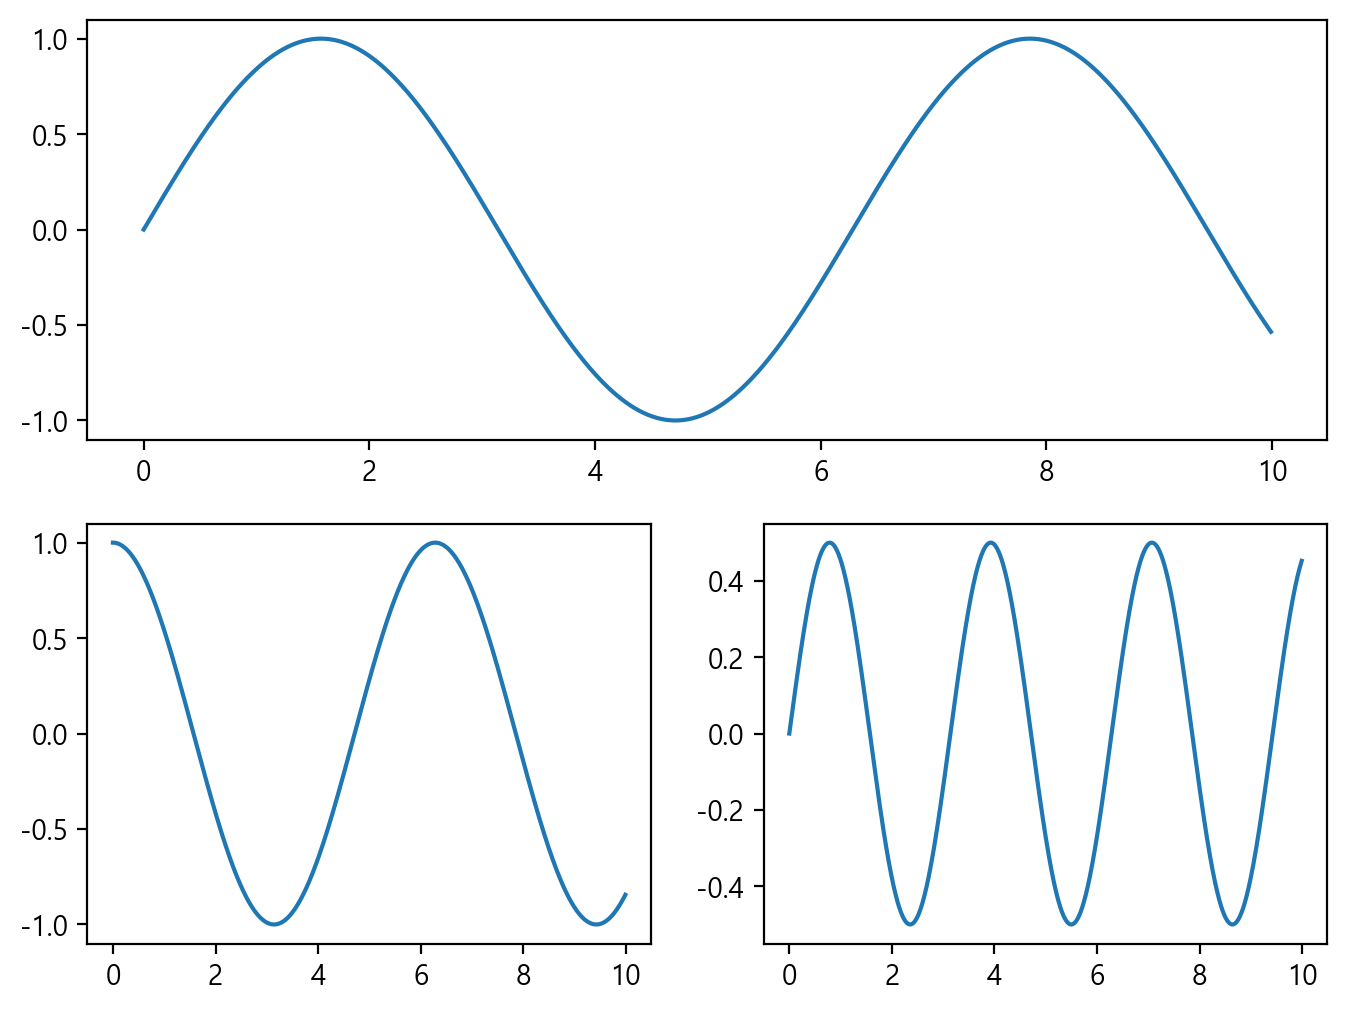

In [5]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.subplot(2,1, 1); plt.plot(x, np.sin(x))
plt.subplot(2,2, 3); plt.plot(x, np.cos(x))
plt.subplot(2,2, 4); plt.plot(x, np.sin(x)*np.cos(x))

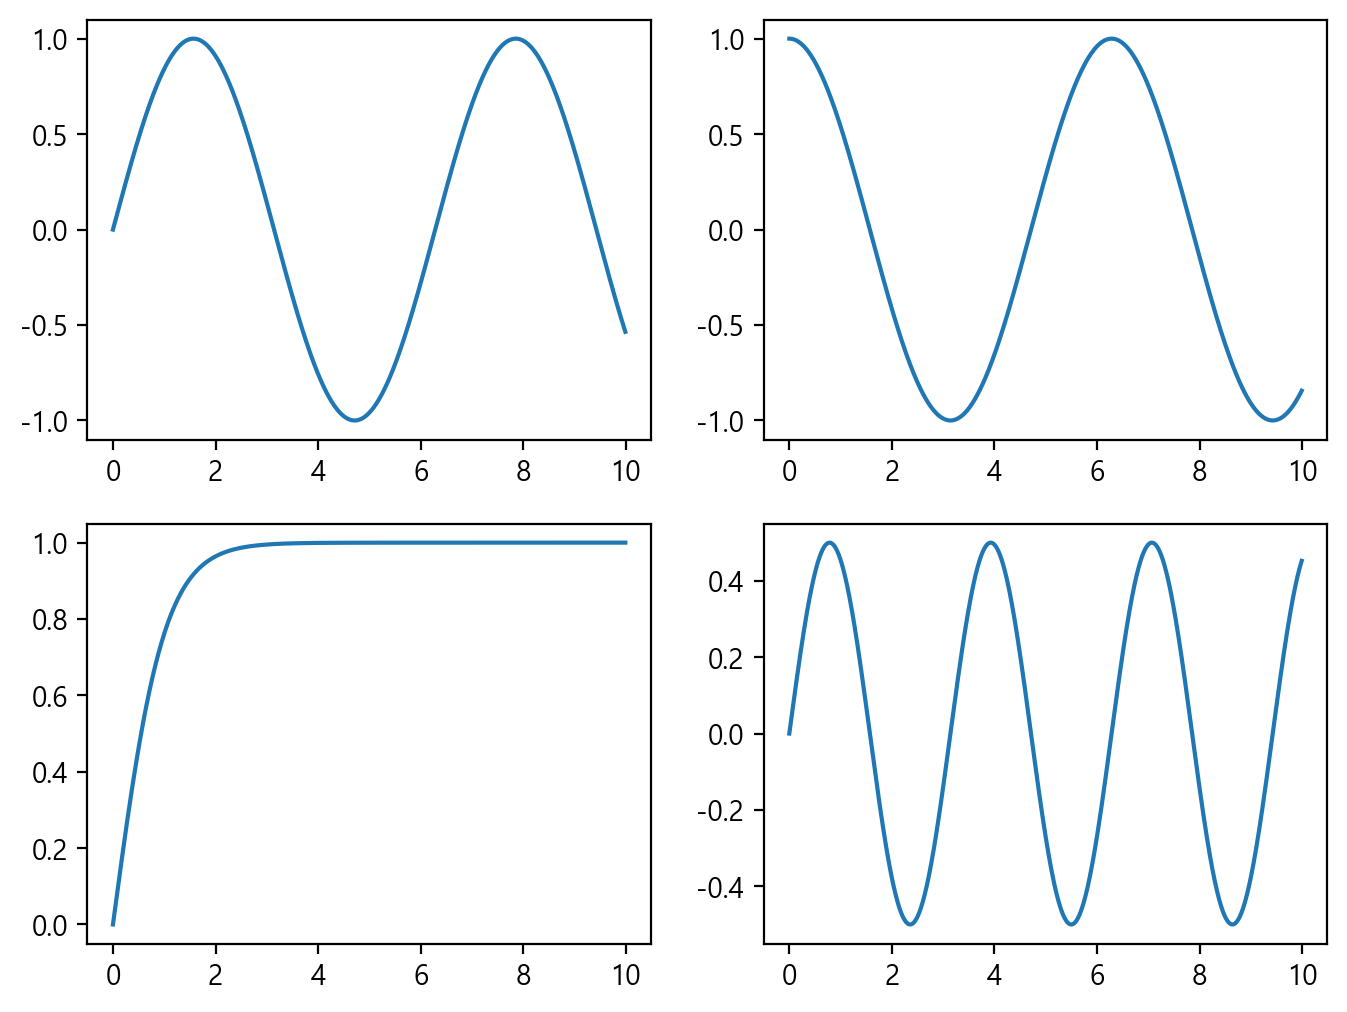

In [6]:
plt.figure(figsize=(8,6))
plt.subplot(2,2, 1); plt.plot(x, np.sin(x))
plt.subplot(2,2, 2); plt.plot(x, np.cos(x))
plt.subplot(2,2, 3); plt.plot(x, np.tanh(x))
plt.subplot(2,2, 4); plt.plot(x, np.sin(x)*np.cos(x))

### 2) subplot()함수로 서브플롯 추가
- 교안(14page) https://wikidocs.net/92085

<function matplotlib.pyplot.show(close=None, block=None)>

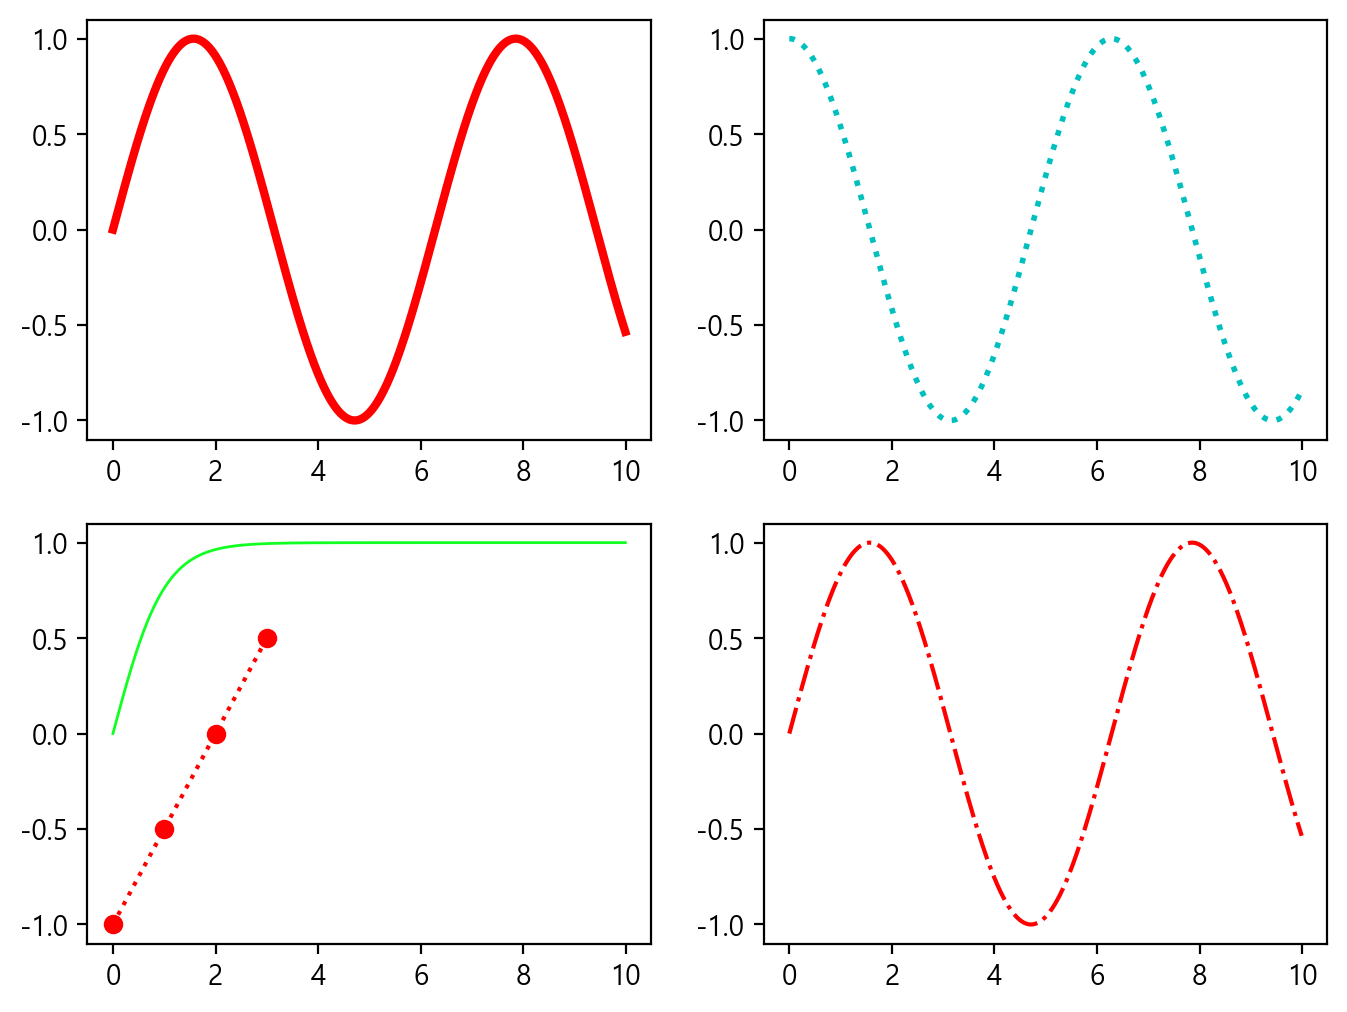

In [8]:
# 2행2열 서브플롯
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8,6))
axes[0,0].plot(x, np.sin(x), 'r', linewidth=3)
axes[0,1].plot(x, np.cos(x), 'c:', linewidth=2) # color='c', linestyle=':', '--', '-'
axes[1,0].plot([0,1,2,3],[-1,-0.5, 0, 0.5], 'ro:') # color='r', marker='o'
axes[1,0].plot(x, np.tanh(x), '#11FF22',linewidth=1)
axes[1,1].plot(x, np.sin(x), 'r-.')
plt.show

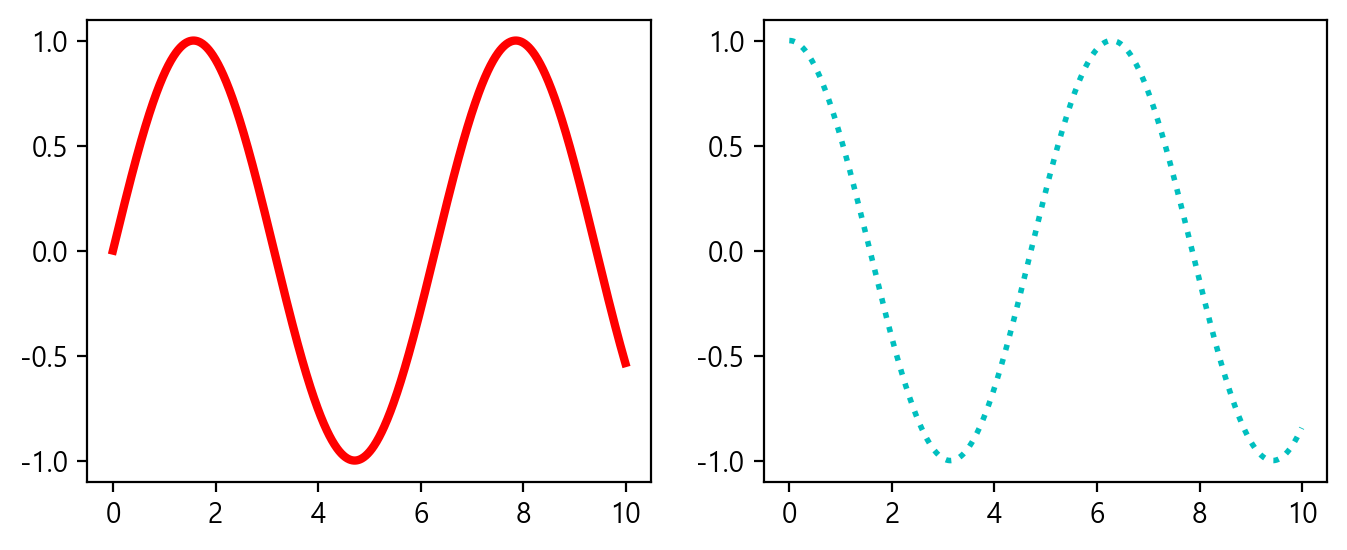

In [9]:
# 2행2열 서브플롯
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8,3))

axes[0].plot(x, np.sin(x), 'r', linewidth=3)
axes[1].plot(x, np.cos(x), 'c:', linewidth=2) # color='c', linestyle=':', '--', '-'

### 3) pandas.DataFrame.plot()
- plt.plot(x,y,fmt)
- df.plot(x=열이름, y=열이름, kind='line' figsize, title, xlim, ylim, ...)
    * kind : line(기본값), scatter(점도표), bar, barh, box, pie, density, ...
    * xlim, ylim : list/tuple

In [10]:
from seaborn import load_dataset
iris = load_dataset('iris')
iris.sample()

,sepal_length,sepal_width,petal_length,petal_width,species
104,6.5,3.0,5.8,2.2,virginica


범례사용 : https://stackoverflow.com/questions/30490740/move-legend-outside-figure-in-seaborn-tsplot

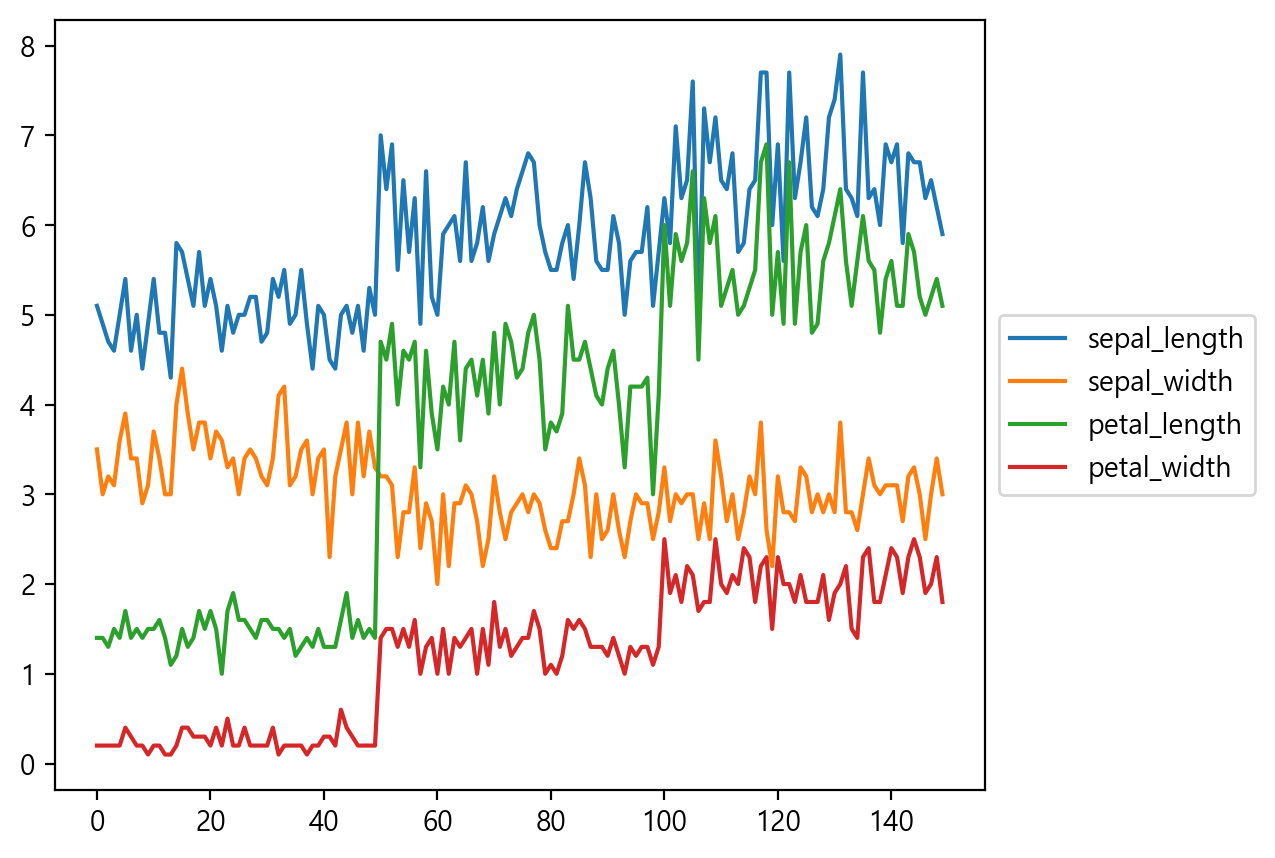

In [11]:
iris.plot(kind='line', figsize=(6,5))
#plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.savefig('data/ch12_iris.jpg') # , bbox_inches='tight'
plt.show()

In [12]:
iris.corr(numeric_only=True)

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


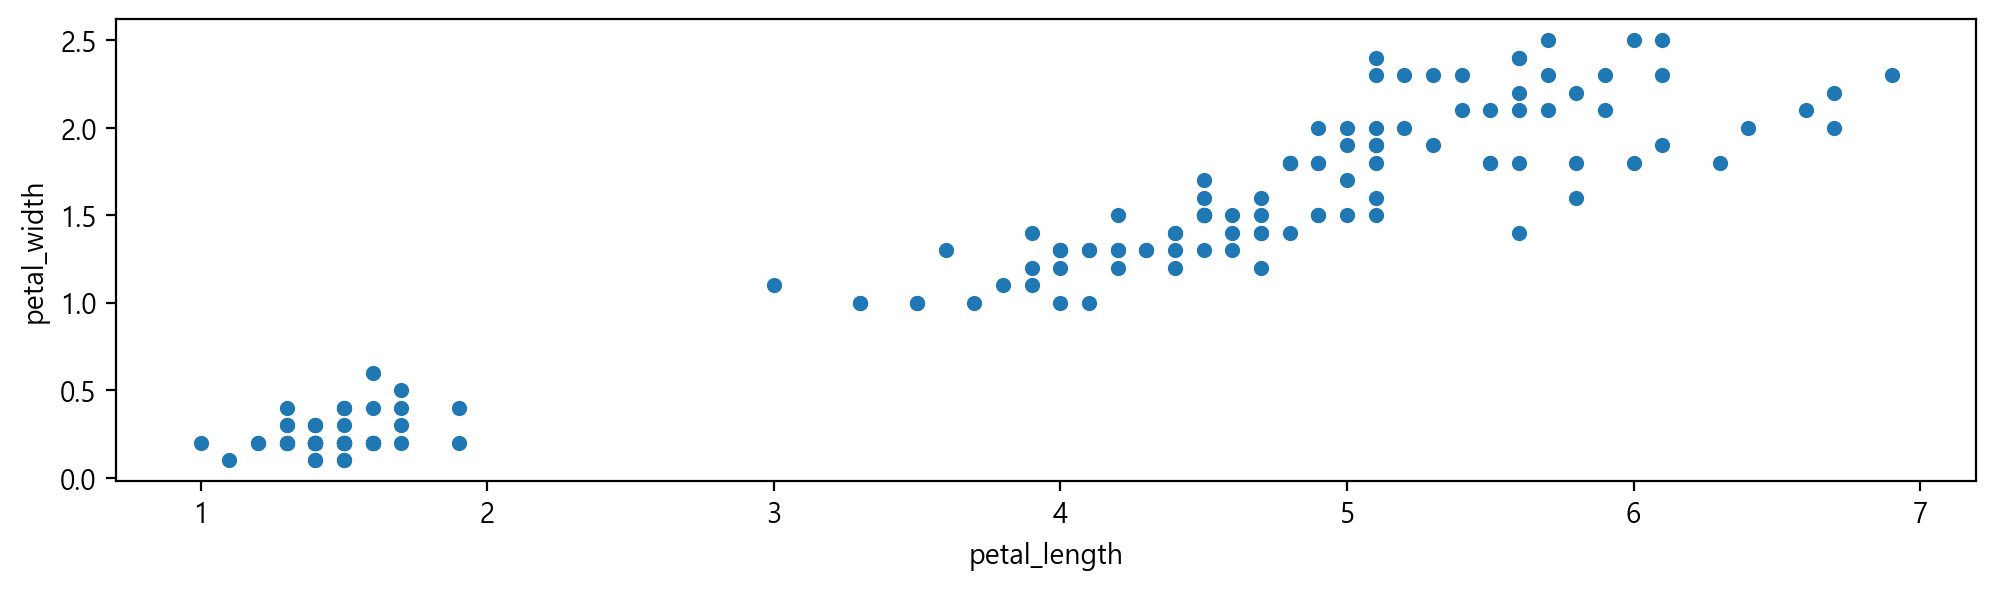

In [13]:
iris.plot(x='petal_length', y='petal_width', kind='scatter', figsize=(12,3))
plt.show()

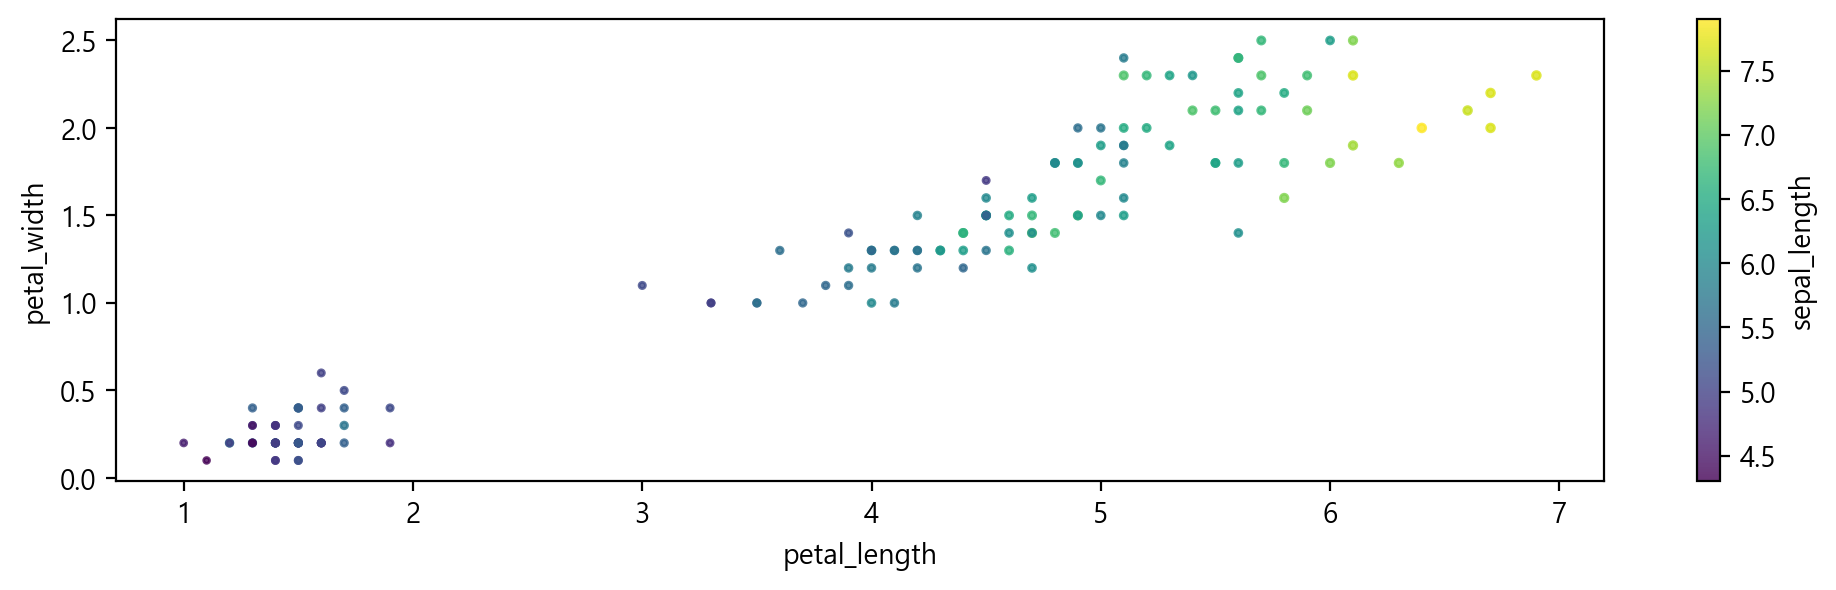

In [14]:
iris.plot(kind='scatter',
         x='petal_length',
         y='petal_width',
         figsize=(12,3),
         s='sepal_length', # size
         c='sepal_length', # color
         alpha=.8)  # 0<=투명도<=1
plt.show()

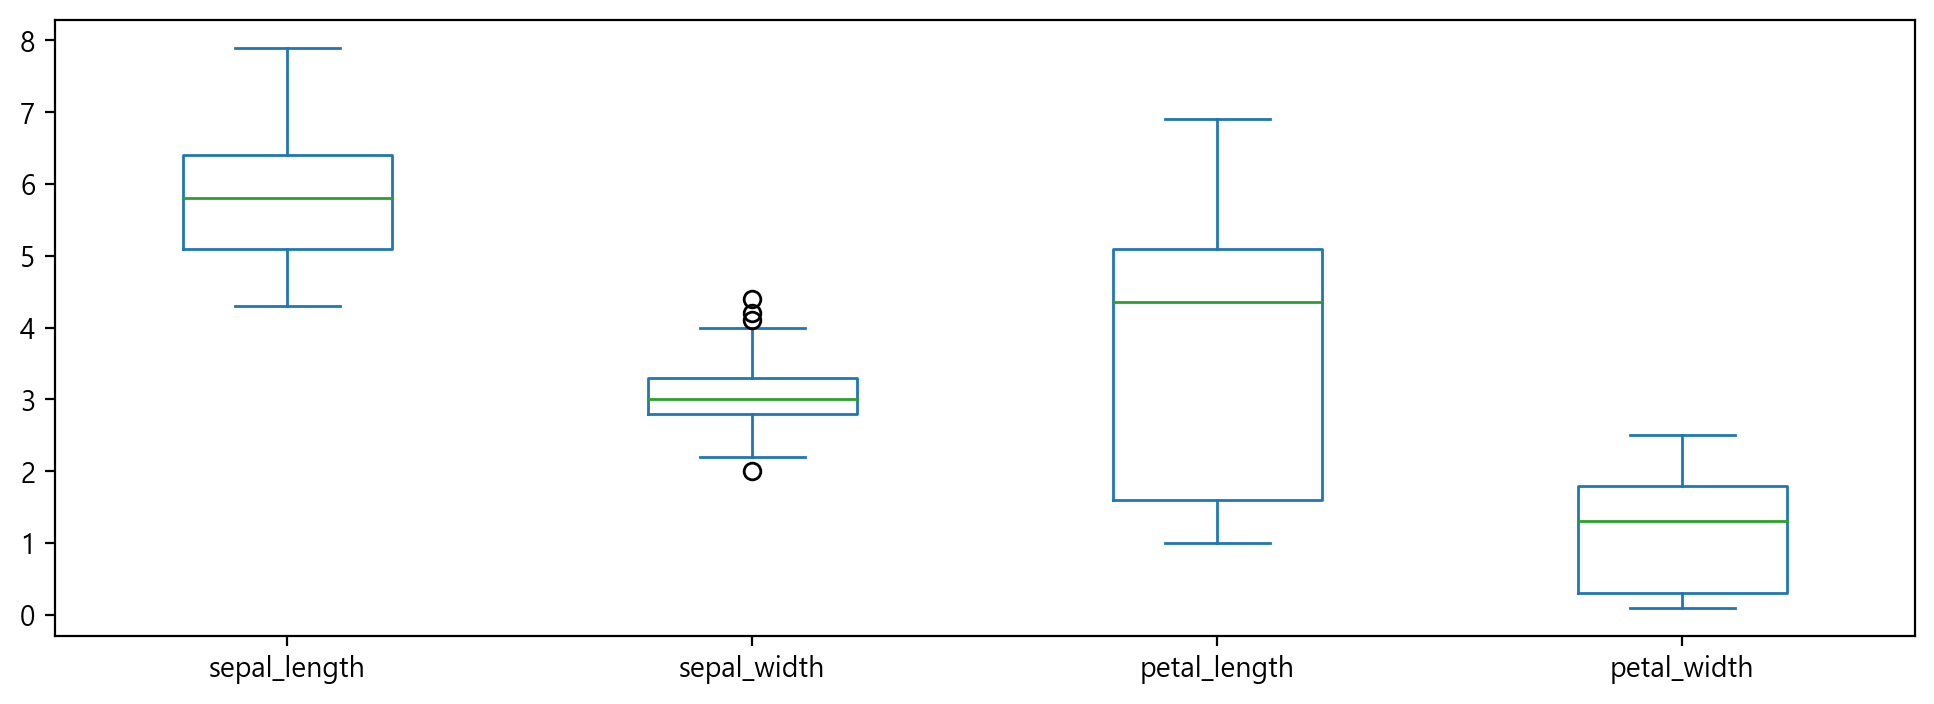

In [15]:
# 모든 열의 boxplot(이상치 여부, q1, q2, q3, min, max)
iris.plot(kind='box', figsize=(12,4))
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

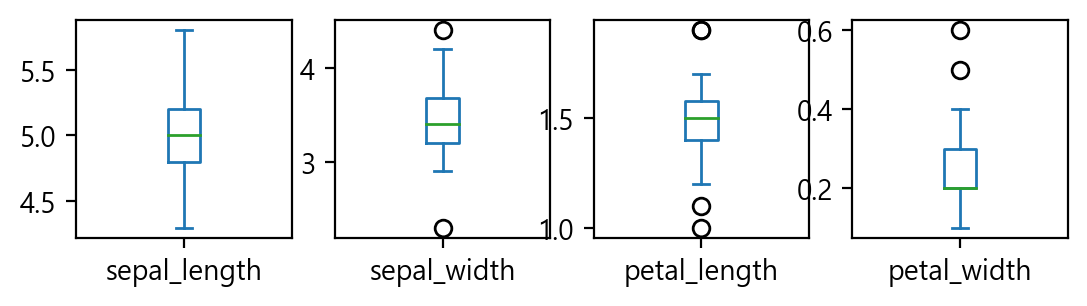

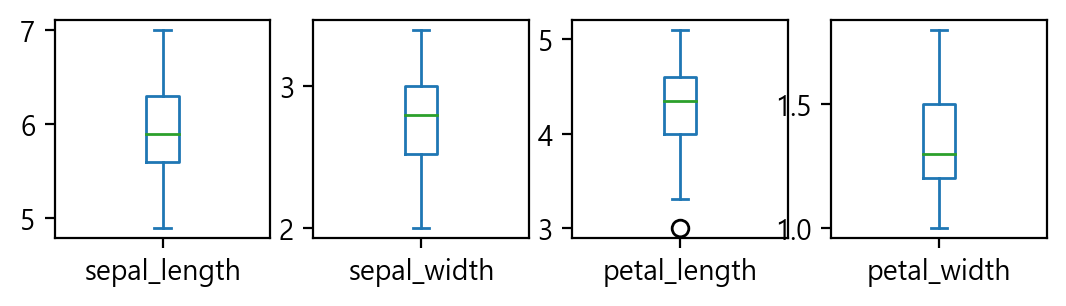

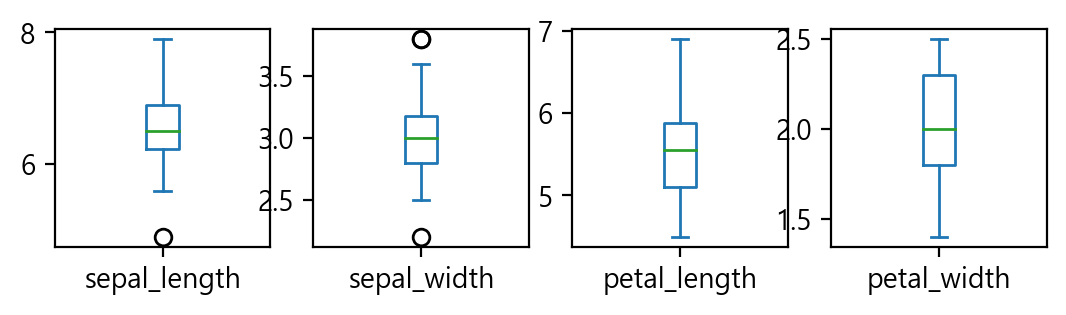

In [16]:
# 종별 boxplot
iris.groupby('species').plot(kind='box',
                            subplots=True,
                            layout=(3,4),
                            sharex=True)
plt.show

## 1.4 다양한 그래프 그리기
- pyplot함수들 : https://matplotlib.org/api/_as_gen/matplotlib.pyplot.html
### 1) plt.scatter() : 산점도

<function matplotlib.pyplot.show(close=None, block=None)>

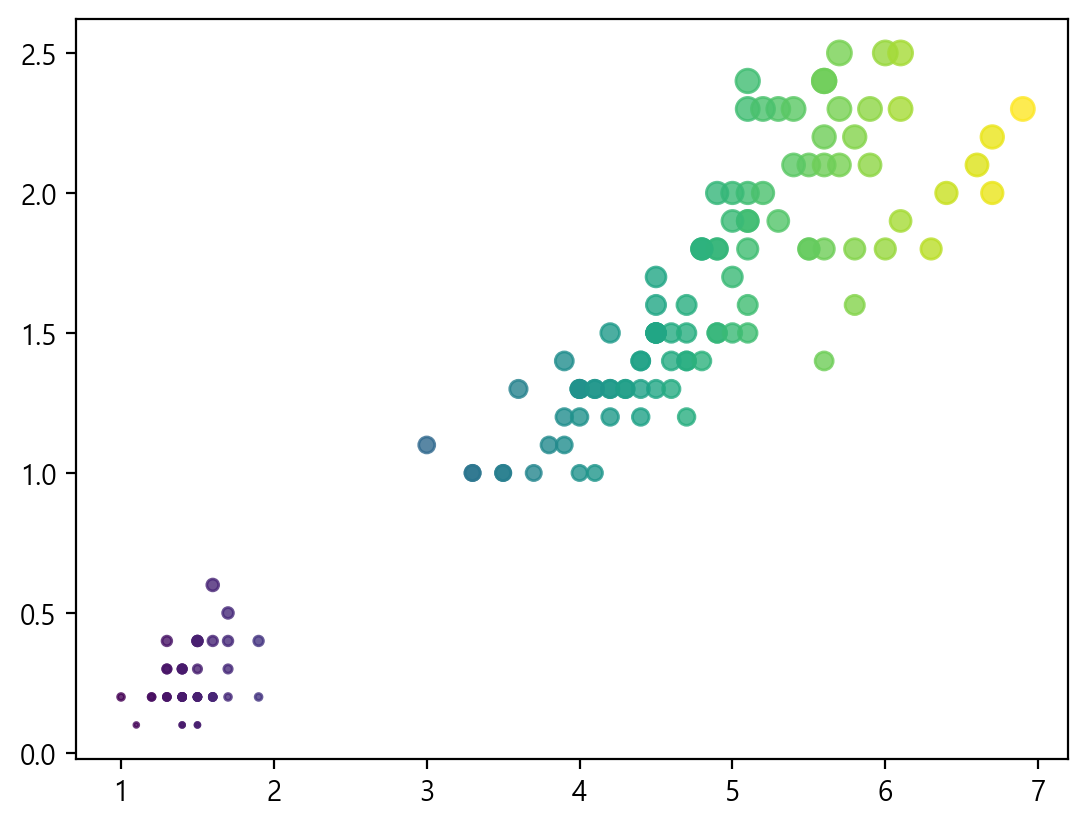

In [17]:
plt.scatter(iris.petal_length, iris.petal_width,
           s=iris.petal_width*30,  # size
           c=iris.petal_length*20, # color
           alpha=.8)
plt.show

### 2) boxplot(단점: 분포를 몰라). violinplot()

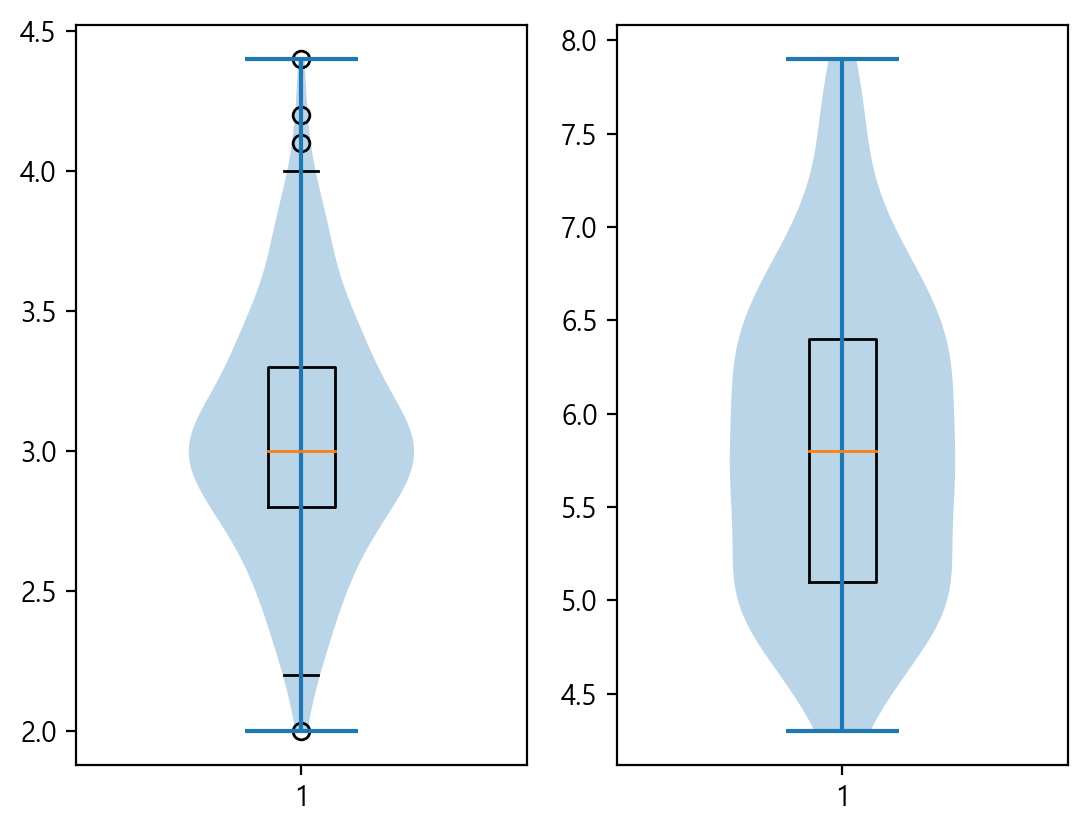

In [18]:
fig, axes = plt.subplots(nrows=1, ncols=2)
axes[0].boxplot(iris.sepal_width)
axes[0].violinplot(iris.sepal_width)
axes[1].boxplot(iris.sepal_length)
axes[1].violinplot(iris.sepal_length)
plt.show()

### 3) bar(), barh(), axvline(수직선), axhline(수평선)

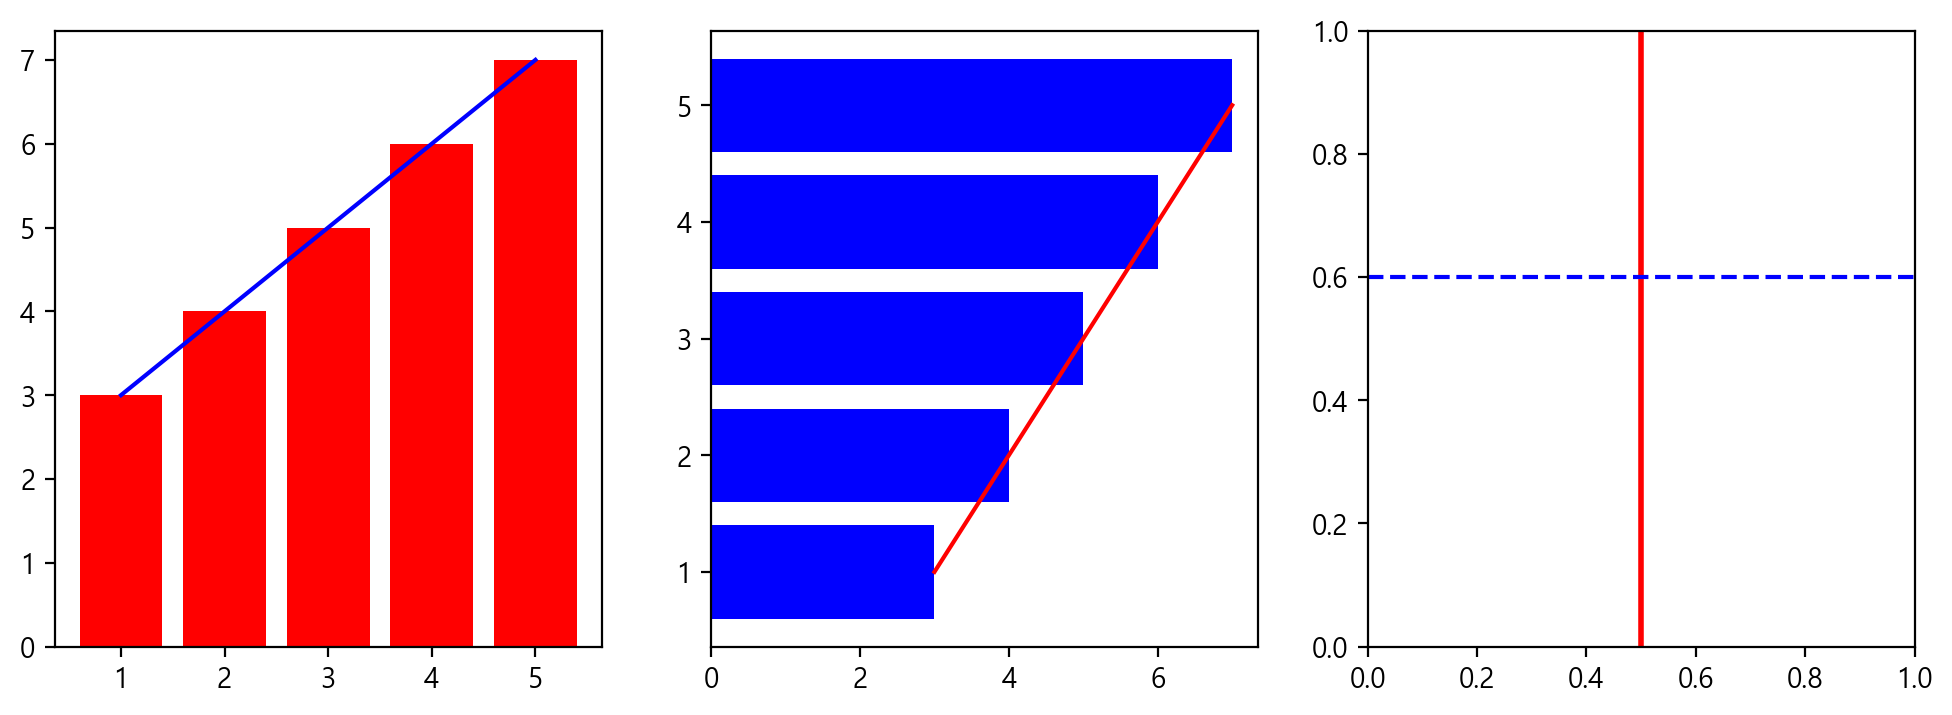

In [19]:
x=[1,2,3,4,5]
y=[3,4,5,6,7]
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12,4))
axes[0].bar(x,y, color='r')
axes[0].plot(x,y, color='b')
axes[1].barh(x,y, color='b')
axes[1].plot(y,x, color='r')
axes[2].axvline(0.5, c='r', linewidth=2)
axes[2].axhline(0.6, c='b', linestyle='--')

### 4) hist(도수분포표: histogram)

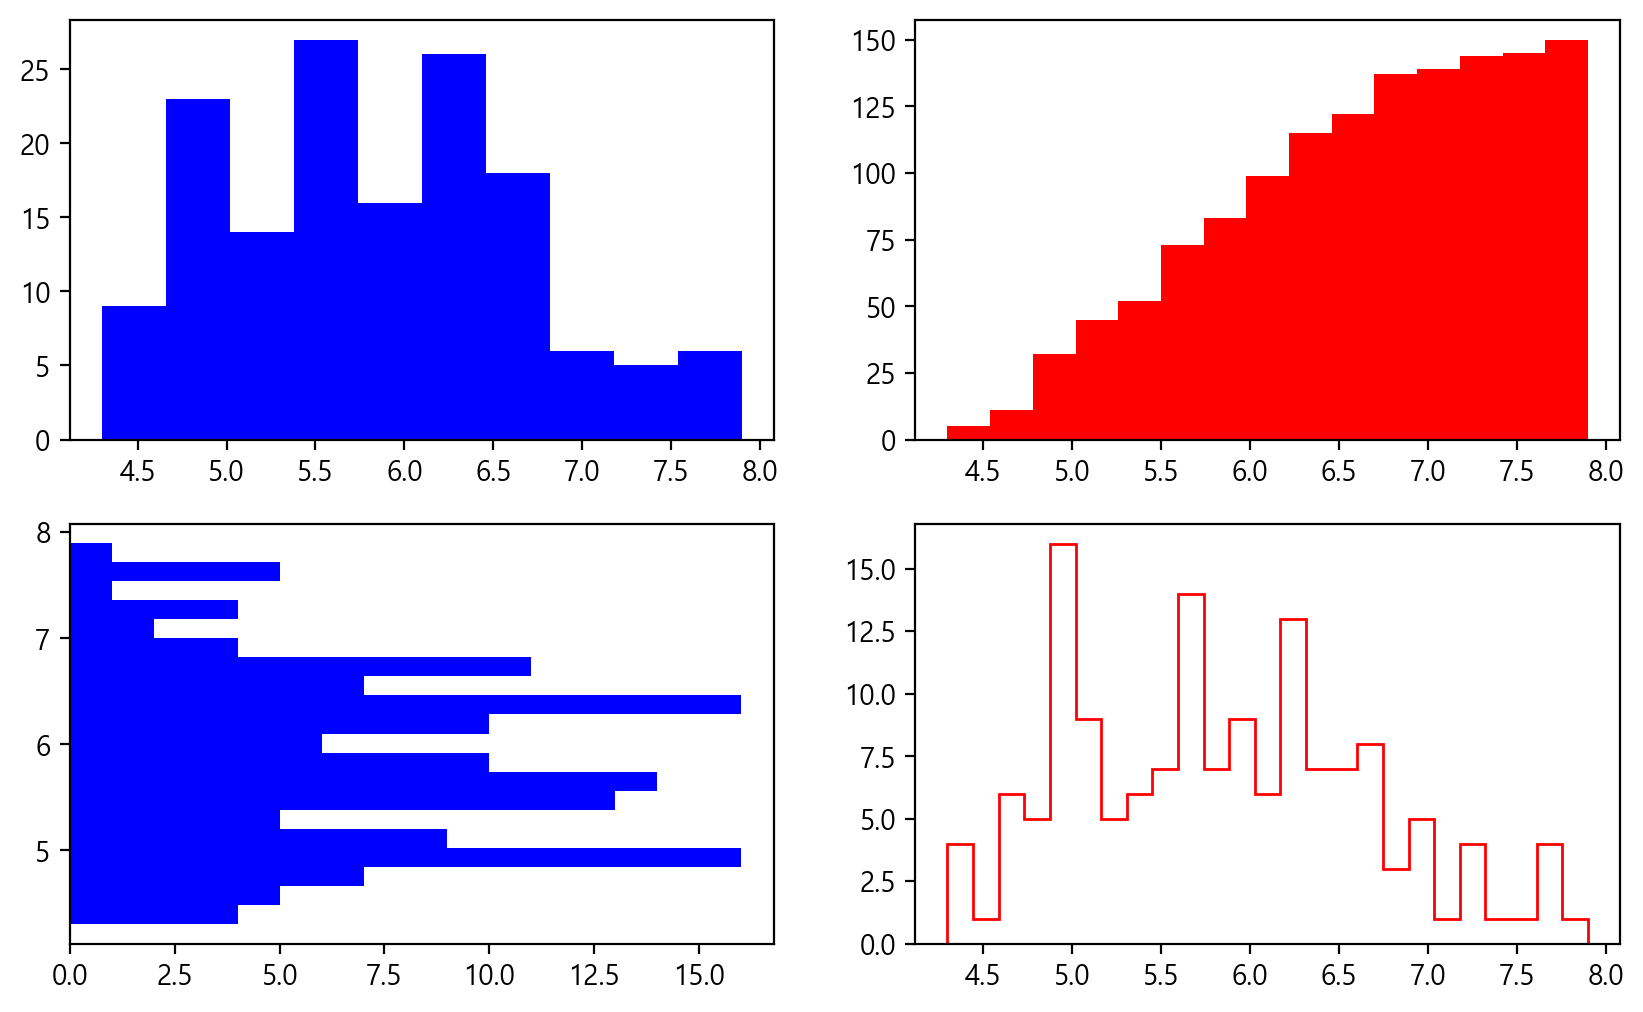

In [20]:
fig, axes = plt.subplots(2,2, figsize=(10,6))
axes[0,0].hist(iris.sepal_length, bins=10, color='b') # 히스토그램(도수분포표)
axes[0,1].hist(iris.sepal_length, bins=15, color='r', cumulative=True) # 누적히스토그램
axes[1,0].hist(iris.sepal_length, bins=20, color='b', orientation='horizontal') # 수평히스토그램
axes[1,1].hist(iris.sepal_length, bins=25, color='r', histtype='step') # 계단형(?)
plt.show()

## 1.5 그래프 커스터마이징
### 1) linestype, linewidth, color, marker, ... (plot의 매개변수로 지정)
### 2) text(), annotate()
- 참고 : https://matplotlib.org/api/axes_api.html#text-and-annotations (교안 25page)

In [21]:
# 개별 폰트 설정을 위한 방법
from matplotlib.font_manager import FontProperties
font_path = 'C:/Windows/Fonts/H2HDRM.TTF' # 폰트파일(네이버폰트, 구글폰트 등에서 다운로드, 구글폰트 등에서 다운로드하거나 pc의 폰트파일 이용)
font_prop = FontProperties(fname=font_path, size=25)

<function matplotlib.pyplot.show(close=None, block=None)>

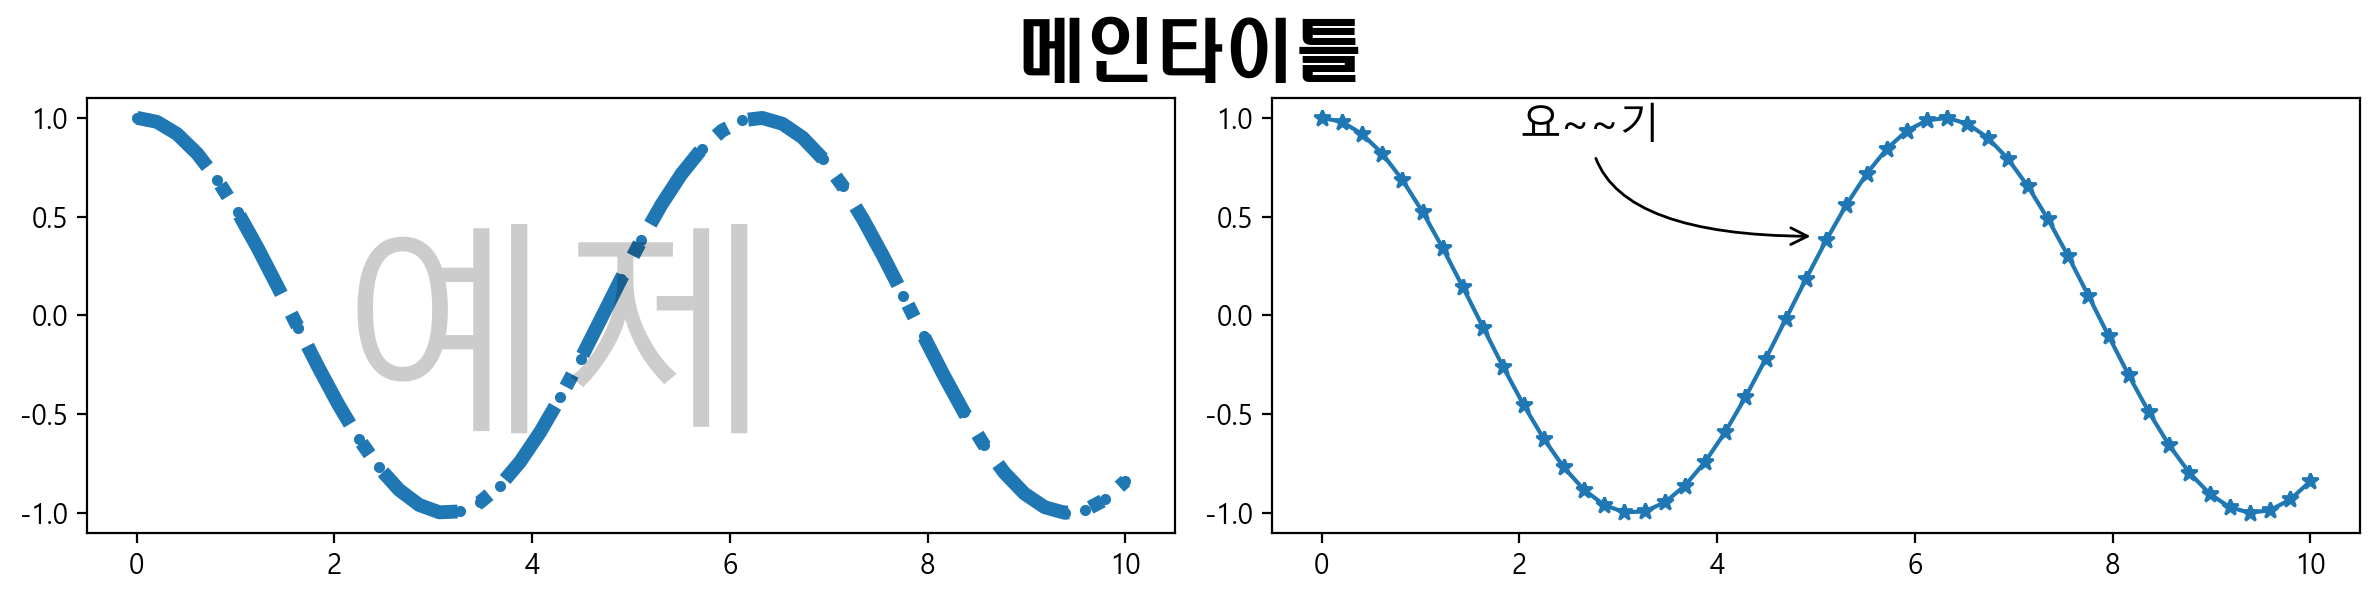

In [22]:
import numpy as np
x = np.linspace(0,10) # num=50 default
y = np.cos(x)
fig, axes = plt.subplots(1, 2, figsize=(12,3))
axes[0].plot(x,y, marker='.', linewidth=5, linestyle='-.')
axes[0].text(2, -0.5, '예제', fontsize=80, alpha=0.2)
axes[1].plot(x,y, marker='*')
axes[1].annotate("요~~기", xytext=(2,0.9), # 글자가 있을 좌표 위치 (좌하)
                 xy=(5,0.4), #화살표가 가리킬 좌표 위치
                 fontsize=15,
                 arrowprops=dict(arrowstyle='->',
                                 connectionstyle='angle3') # angle(꺽은선), arc(직선), ...
                )
plt.tight_layout(rect=[0,0,1,0.9]) # left, bottom, right, top : 경계의 상대적 비율
plt.suptitle('메인타이틀', fontproperties=font_prop)

plt.show

### 3) 수학기호
    * https://matplotlib.org/users/mathtext.html(교안 30page)

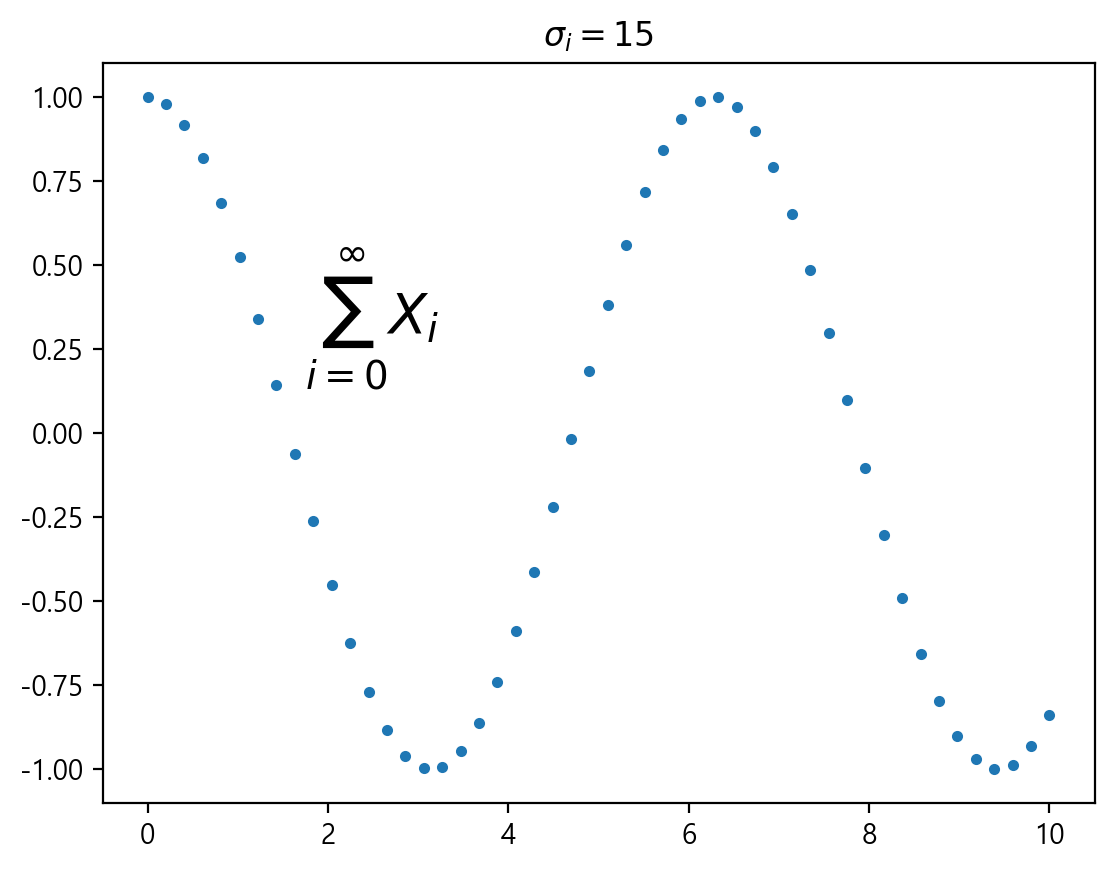

In [23]:
plt.scatter(x,y,marker='.')
plt.title(r'$\sigma_i=15$')
plt.text(1.75,0.3, r'$\sum_{i=0}^\infty X_i$', fontsize=20)
plt.show()

### 4) 축과 눈금
    - https://matplotlib.org/3.1.0/api/axis_api.html(교안 33page)

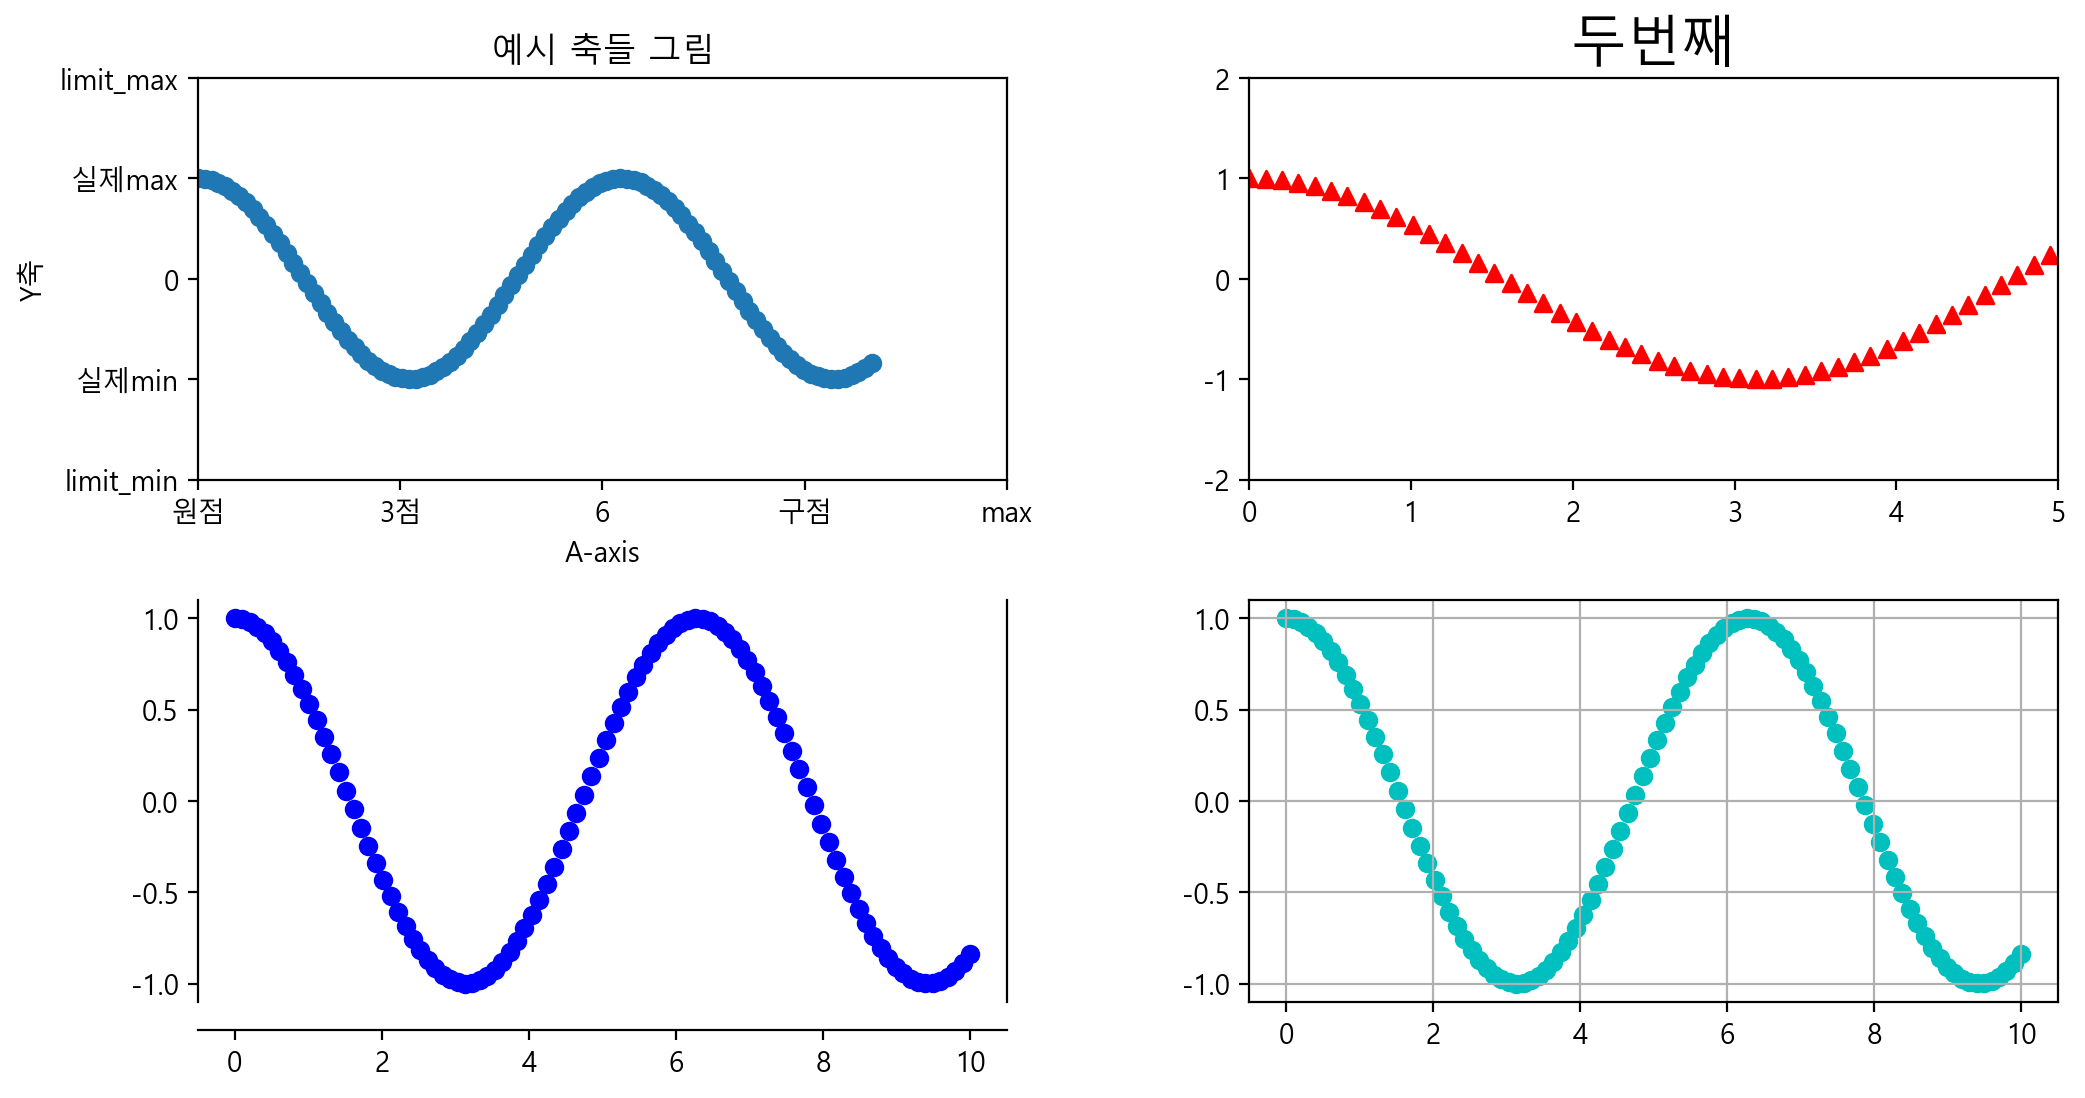

In [24]:
x = np.linspace(0,10,100) # 0,10까지 50개 값을 배열로 생성
y = np.cos(x)
fig, axes = plt.subplots(2,2,figsize=(12,6))
# 서브플롯끼리 여백 조정 (hspace 위아래 여백, wspace 좌우 여백)
plt.subplots_adjust(hspace=0.3, wspace=0.3)
axes[0,0].scatter(x,y)
axes[0,0].set(title='예시 축들 그림', ylabel='Y축', xlabel='A-axis',
              xlim=[0,12], # x축 눈금의 범위
              ylim=[-2,2],# x=y축 눈금의 범위
              xticks=[0,3,6,9,12], # x축 눈금
              xticklabels = ['원점', '3점', 6, '구점', 'max'], # x의 눈금 라벨
              yticks=[-2,-1,0,1,2],  # y축 눈금
              yticklabels = ['limit_min', '실제min', 0, '실제max', 'limit_max'] # y의 눈금 라벨
             )

axes[0,1].scatter(x,y, c='r', marker='^')
axes[0,1].set_title('두번째', fontsize=20)
axes[0,1].set_xlim(0,5) # set(xlim=[0,5])
axes[0,1].set_ylim(-2,2)

axes[1,0].scatter(x,y, c='b')
axes[1,0].spines['top'].set_visible(False)

axes[1,1].scatter(x,y, c='c')
axes[1,0].spines['bottom'].set_position( ('outward', 10))
axes[1,1].grid(True)

plt.show()

### 5) 축 공유

In [25]:
x = np.arange(0,10)
y1 = 0.5 * x**2
y2 = -1 * y1

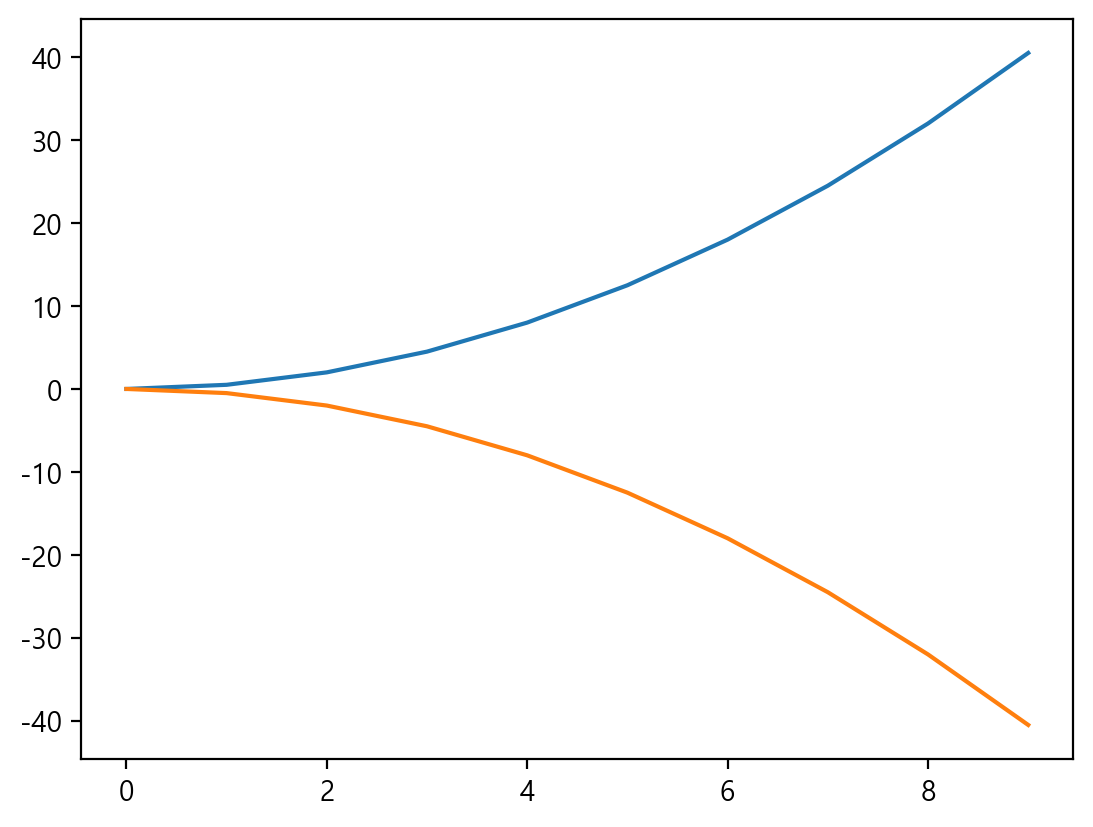

In [26]:
plt.plot(x,y1)
plt.plot(x,y2)
plt.show()

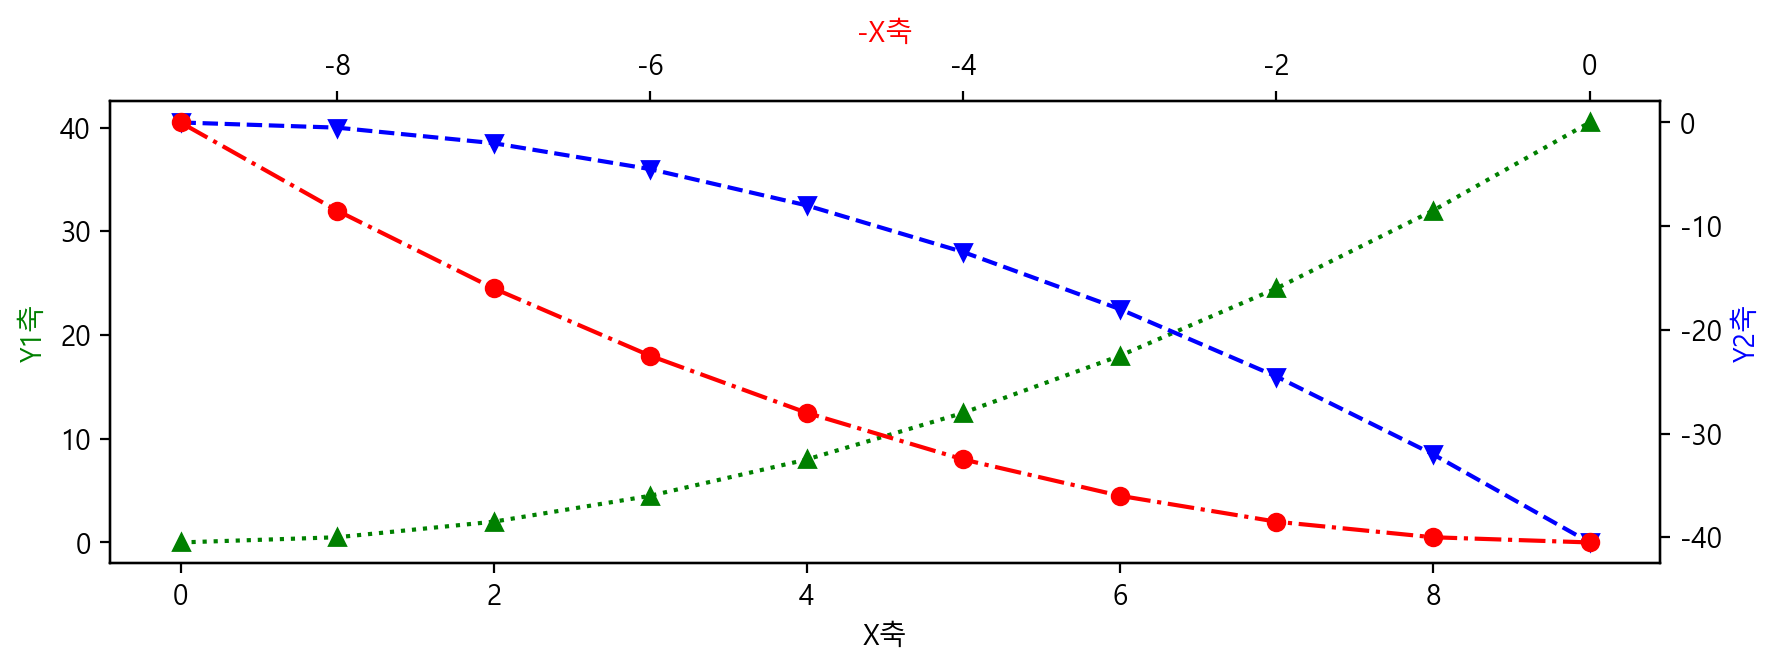

In [27]:
fig, ax1 = plt.subplots(figsize=(10,3))

ax1.plot(x, y1, 'g^:')
ax1.set_xlabel('X축')
ax1.set_ylabel('Y1축', c='g')

ax2 = ax1.twinx() # ax1과 x축을 공유하는 ax2
ax2.plot(x, y2, 'bv--')
ax2.set_ylabel('Y2축', c='b')

ax3 = ax1.twiny() # ax1과 y축을 공유하는 ax3
ax3.plot(-x, y1, 'ro-.')
ax3.set_xlabel('-X축', c='r')

plt.show()

### 6) 범례표시
범례사용 : https://stackoverflow.com/questions/30490740/move-legend-outside-figure-in-seaborn-tsplot

### 7) 플롯 스타일 지정

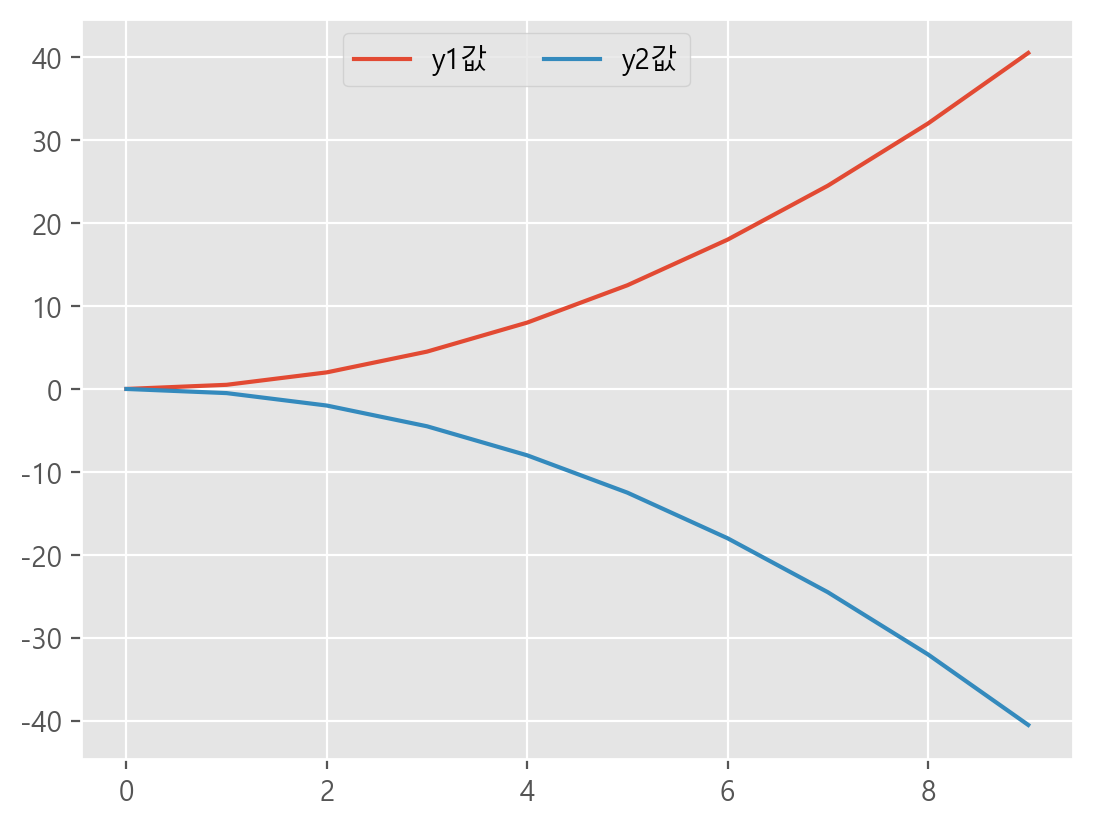

In [28]:
plt.style.use('ggplot') # 스타일 지정하는 함수를 쓰면 모든 설정 초기화
plt.plot(x,y1, label='y1값')
plt.plot(x,y2, label='y2값')
plt.legend(loc='upper left', ncol=2, bbox_to_anchor=(.25, 1))
plt.show()

In [96]:
# # pip install wordcloud
# # Libraries
# from wordcloud import WordCloud
# import matplotlib.pyplot as plt

# # Create a list of word
# with open('data/na_news_0502.txt', 'r', encoding='utf-8') as f:
#     text = f.readlines()

# #    print(text)
# #text=(r'Python Python Python Matplotlib')

# # Create the wordcloud object
# wordcloud = WordCloud(width=480, height=480, margin=0).generate(text)

# # Display the generated image:
# plt.imshow(wordcloud, interpolation='bilinear')
# plt.axis('off')
# plt.margins(x=0, y=0)
# plt.show()

AttributeError: 'list' object has no attribute 'replace'